In [2]:
import numpy as np

import tensorflow as tf

In [3]:

from IPython.display import clear_output
import matplotlib.pyplot as plt

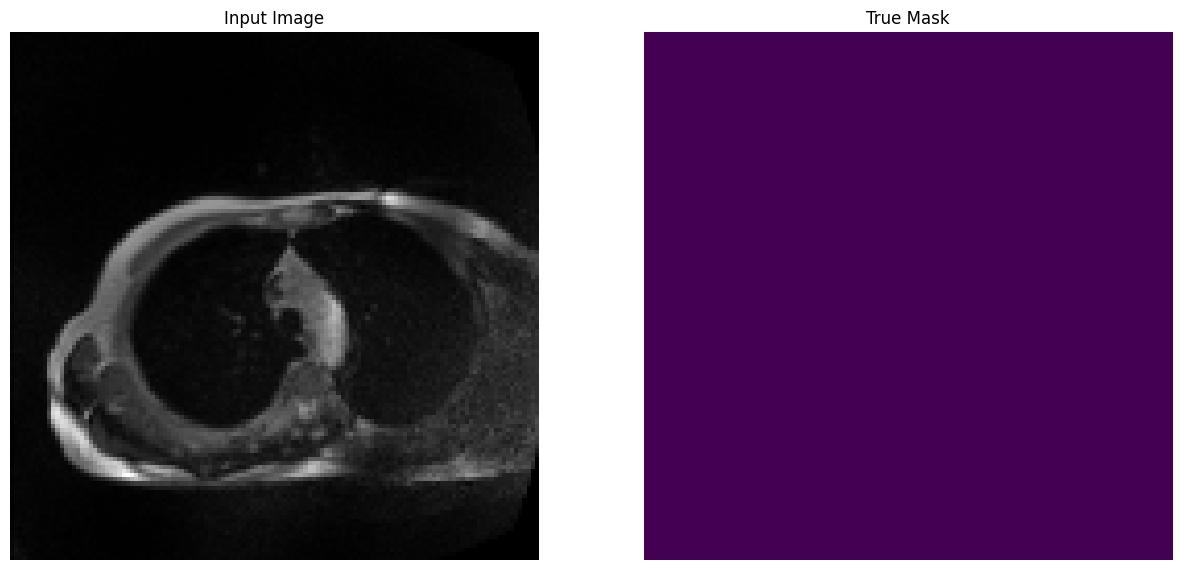

In [7]:
import numpy as np
import tensorflow as tf
import glob
import os
from IPython.display import clear_output
import matplotlib.pyplot as plt

train_image_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/train/images/*.png"
train_mask_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/train/masks/*.png"

image_files = glob.glob(train_image_dir)
mask_files = sorted(glob.glob(train_mask_dir))

def decode_img(img):
    img = tf.image.decode_png(img, channels=3)  # Ensure your image is rgb
    return tf.image.resize(img, [128, 128])

def decode_mask(mask):
    mask = tf.image.decode_png(mask, channels=1)  # Adjust channels if masks are saved differently
    return tf.image.resize(mask, [128, 128], method='nearest')

def process_path(image_path, mask_path):
    image = tf.io.read_file(image_path)
    mask = tf.io.read_file(mask_path)
    image = decode_img(image)
    mask = decode_mask(mask)
    return image, mask - 1  # Adjust mask labels if necessary

# Use Dataset.from_tensor_slices to read paths
dataset = tf.data.Dataset.from_tensor_slices((image_files, mask_files))
dataset = dataset.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)

# Dataset operations
BATCH_SIZE = 64
BUFFER_SIZE = 1000

train_batches = (
    dataset
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

def display(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

# Example of displaying images and masks
for images, masks in train_batches.take(1):
    sample_image, sample_mask = images[0], masks[0]
    display([sample_image, sample_mask])


In [8]:
import tensorflow as tf
import numpy as np

# Assuming you have a path to one mask
mask_path = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/train/masks/your_mask_file.png"

def decode_mask(mask):
    mask = tf.image.decode_png(mask, channels=1)  # Masks are assumed to be single-channel
    return mask

mask = tf.io.read_file(mask_path)
mask = decode_mask(mask)
mask = tf.image.resize(mask, [128, 128], method='nearest')  # Resize if necessary
mask_numpy = mask.numpy().astype(np.int32)  # Convert to numpy array for analysis

unique_classes = np.unique(mask_numpy)
print("Unique values in mask:", unique_classes)


NotFoundError: {{function_node __wrapped__ReadFile_device_/job:localhost/replica:0/task:0/device:CPU:0}} NewRandomAccessFile failed to Create/Open: C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/train/masks/your_mask_file.png : The system cannot find the file specified.
; No such file or directory [Op:ReadFile]

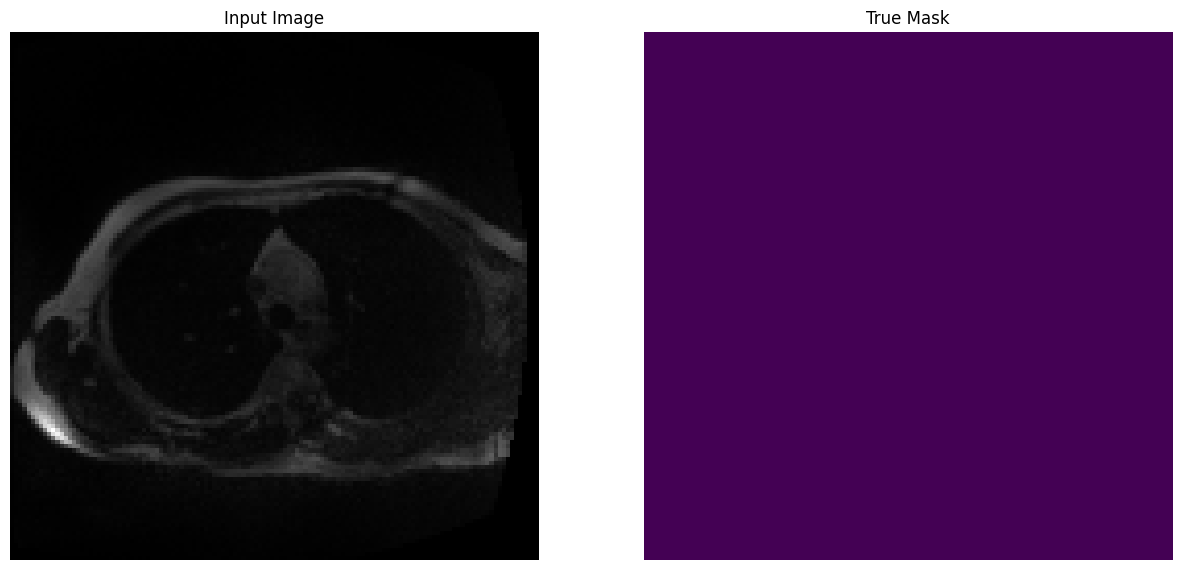

In [9]:
import tensorflow as tf
import glob

train_image_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/train/images/*.png"
train_mask_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/train/masks/*.png"

image_files = glob.glob(train_image_dir)
mask_files = sorted(glob.glob(train_mask_dir))

def decode_img(img):
    img = tf.image.decode_png(img, channels=3)  # Ensure your image is rgb
    img = tf.image.resize(img, [128, 128])
    return img / 255.0  # Normalize images to [0, 1]

def decode_mask(mask):
    mask = tf.image.decode_png(mask, channels=1)  # Masks are grayscale
    mask = tf.image.resize(mask, [128, 128], method='nearest')
    return mask  # Keep mask values as 0, 1, 2, 3

def process_path(image_path, mask_path):
    image = tf.io.read_file(image_path)
    mask = tf.io.read_file(mask_path)
    image = decode_img(image)
    mask = decode_mask(mask)
    return image, mask

# Use Dataset.from_tensor_slices to read paths
dataset = tf.data.Dataset.from_tensor_slices((image_files, mask_files))
dataset = dataset.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)

# Dataset operations
BATCH_SIZE = 64
BUFFER_SIZE = 1000

train_batches = (
    dataset
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

def display(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

# Example of displaying images and masks
for images, masks in train_batches.take(1):
    sample_image, sample_mask = images[0], masks[0]
    display([sample_image, sample_mask])


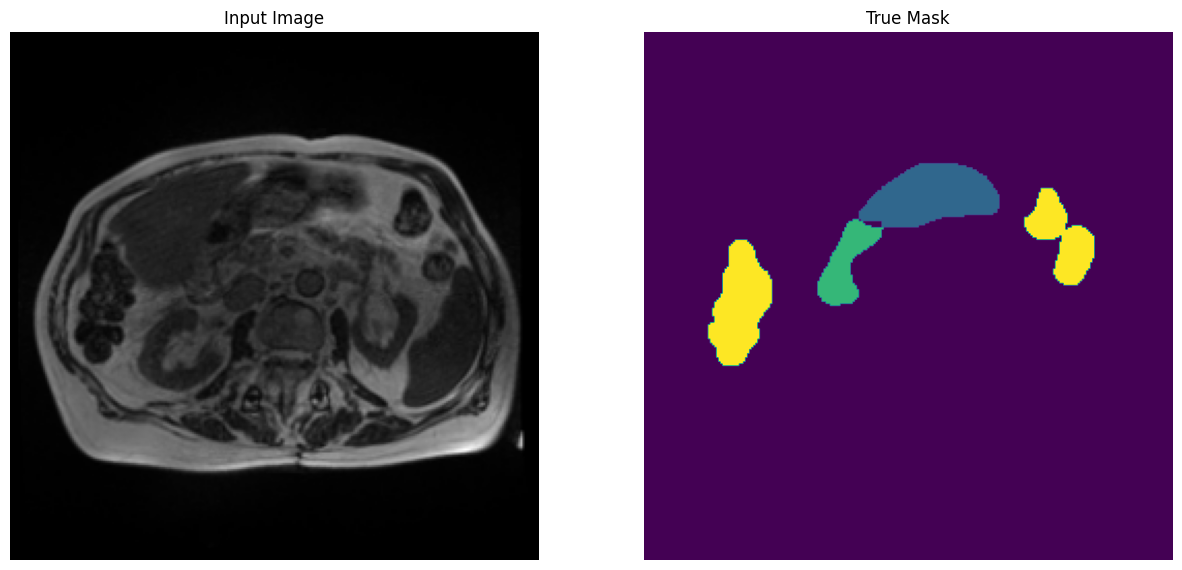

In [12]:
import tensorflow as tf
import glob

train_image_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/train/images/*.png"
train_mask_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/train/masks/*.png"

image_files = glob.glob(train_image_dir)
mask_files = sorted(glob.glob(train_mask_dir))

def decode_img(img):
    img = tf.image.decode_png(img, channels=3)  # Ensure your image is rgb
    img = tf.image.resize(img, [256, 256])
    return img / 255.0  # Normalize images to [0, 1]

def decode_mask(mask):
    mask = tf.image.decode_png(mask, channels=1)  # Masks are grayscale
    mask = tf.image.resize(mask, [256, 256], method='nearest')
    return mask  # Keep mask values as 0, 1, 2, 3

def process_path(image_path, mask_path):
    image = tf.io.read_file(image_path)
    mask = tf.io.read_file(mask_path)
    image = decode_img(image)
    mask = decode_mask(mask)
    return image, mask

# Use Dataset.from_tensor_slices to read paths
dataset = tf.data.Dataset.from_tensor_slices((image_files, mask_files))
dataset = dataset.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)

# Dataset operations
BATCH_SIZE = 64
BUFFER_SIZE = 1000

train_batches = (
    dataset
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

def display(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

# Example of displaying images and masks
for images, masks in train_batches.take(1):
    sample_image, sample_mask = images[0], masks[0]
    display([sample_image, sample_mask])


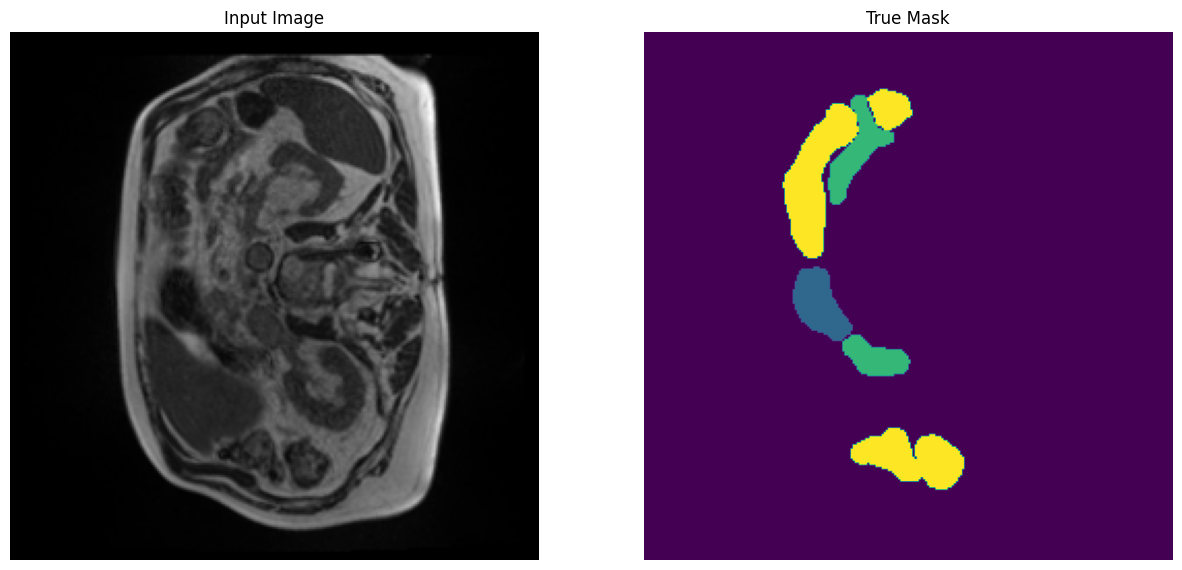

In [16]:
import tensorflow as tf
import glob
import matplotlib.pyplot as plt

train_image_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/train/images/*.png"
train_mask_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/train/masks/*.png"

image_files = glob.glob(train_image_dir)
mask_files = sorted(glob.glob(train_mask_dir))

def decode_img(img):
    img = tf.image.decode_png(img, channels=3)  # Ensure your image is rgb
    img = tf.image.resize(img, [256, 256])
    return img / 255.0  # Normalize images to [0, 1]

def decode_mask(mask):
    mask = tf.image.decode_png(mask, channels=1)  # Masks are grayscale
    mask = tf.image.resize(mask, [256, 256], method='nearest')
    return mask  # Keep mask values as 0, 1, 2, 3

def augment(image, mask):
    # Random flipping
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        mask = tf.image.flip_left_right(mask)
    
    # Random brightness and contrast (image only)
    image = tf.image.random_brightness(image, max_delta=0.1)  # Adjust the brightness by a max delta of 0.1
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)  # Adjust the contrast between 0.9 and 1.1

    # Random rotation (expand the logic if necessary)
    degrees = tf.random.uniform((), minval=0, maxval=4, dtype=tf.int32)
    image = tf.image.rot90(image, k=degrees)
    mask = tf.image.rot90(mask, k=degrees)

    return image, mask

def process_path(image_path, mask_path):
    image = tf.io.read_file(image_path)
    mask = tf.io.read_file(mask_path)
    image, mask = decode_img(image), decode_mask(mask)
    image, mask = augment(image, mask)
    return image, mask

# Use Dataset.from_tensor_slices to read paths
dataset = tf.data.Dataset.from_tensor_slices((image_files, mask_files))
dataset = dataset.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)

# Dataset operations
BATCH_SIZE = 64
BUFFER_SIZE = 1000

train_batches = (
    dataset
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

def display(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Augmented Image', 'Augmented Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

# Example of displaying images and masks with augmentation
for images, masks in train_batches.take(1):
    sample_image, sample_mask = images[0], masks[0]
    display([sample_image, sample_mask])


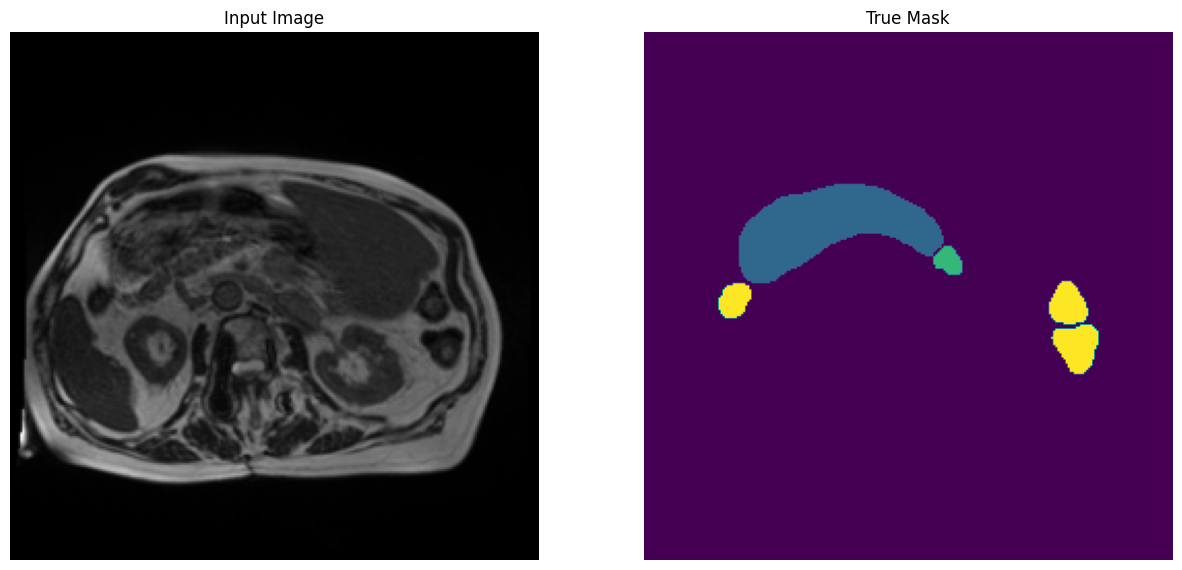

In [21]:
import tensorflow as tf
import glob
import matplotlib.pyplot as plt

train_image_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/train/images/*.png"
train_mask_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/train/masks/*.png"

image_files = glob.glob(train_image_dir)
mask_files = sorted(glob.glob(train_mask_dir))

def decode_img(img):
    img = tf.image.decode_png(img, channels=3)  # Ensure your image is rgb
    img = tf.image.resize(img, [256, 256])
    return img / 255.0  # Normalize images to [0, 1]

def decode_mask(mask):
    mask = tf.image.decode_png(mask, channels=1)  # Masks are grayscale
    mask = tf.image.resize(mask, [256, 256], method='nearest')
    return mask  # Keep mask values as 0, 1, 2, 3

def augment(image, mask):
    # Random flipping
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        mask = tf.image.flip_left_right(mask)
    
    # Random brightness and contrast (image only)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)

    # Random saturation and hue (image only)
    image = tf.image.random_saturation(image, lower=0.7, upper=1.3)
    image = tf.image.random_hue(image, max_delta=0.05)

    # Random rotation
    degrees = tf.random.uniform((), minval=0, maxval=4, dtype=tf.int32)
    image = tf.image.rot90(image, k=degrees)
    mask = tf.image.rot90(mask, k=degrees)

    # Adding random noise
    #noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.05, dtype=tf.float32)
    #image = tf.clip_by_value(image + noise, 0.0, 1.0)

    return image, mask

def process_path(image_path, mask_path):
    image = tf.io.read_file(image_path)
    mask = tf.io.read_file(mask_path)
    image, mask = decode_img(image), decode_mask(mask)
    image, mask = augment(image, mask)
    return image, mask

# Use Dataset.from_tensor_slices to read paths
dataset = tf.data.Dataset.from_tensor_slices((image_files, mask_files))
dataset = dataset.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)

# Dataset operations
BATCH_SIZE = 64
BUFFER_SIZE = 1000

train_batches = (
    dataset
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

def display(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Augmented Image', 'Augmented Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

# Example of displaying images and masks with augmentation
for images, masks in train_batches.take(1):
    sample_image, sample_mask = images[0], masks[0]
    display([sample_image, sample_mask])


In [22]:
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, UpSampling2D, concatenate, Conv2DTranspose, BatchNormalization, Dropout, Lambda

def multi_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=3):
    # Build the model
    inputs = Input((IMG_HEIGHT, IMG_WIDTH, IMG_CHANNELS))
    # Inputs are already normalized in the preprocessing step
    s = inputs

    # Contraction path
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(s)
    c1 = Dropout(0.1)(c1)
    c1 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c1)
    p1 = MaxPooling2D((2, 2))(c1)
    
    # Additional contraction and expansion layers as defined in your code
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p1)
    c2 = Dropout(0.1)(c2)
    c2 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c2)
    p2 = MaxPooling2D((2, 2))(c2)
     
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p2)
    c3 = Dropout(0.2)(c3)
    c3 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c3)
    p3 = MaxPooling2D((2, 2))(c3)
     
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p3)
    c4 = Dropout(0.2)(c4)
    c4 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c4)
    p4 = MaxPooling2D(pool_size=(2, 2))(c4)
     
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(p4)
    c5 = Dropout(0.3)(c5)
    c5 = Conv2D(256, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c5)
    
    #Expansive path 
    u6 = Conv2DTranspose(128, (2, 2), strides=(2, 2), padding='same')(c5)
    u6 = concatenate([u6, c4])
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u6)
    c6 = Dropout(0.2)(c6)
    c6 = Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c6)
     
    u7 = Conv2DTranspose(64, (2, 2), strides=(2, 2), padding='same')(c6)
    u7 = concatenate([u7, c3])
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u7)
    c7 = Dropout(0.2)(c7)
    c7 = Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c7)
     
    u8 = Conv2DTranspose(32, (2, 2), strides=(2, 2), padding='same')(c7)
    u8 = concatenate([u8, c2])
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u8)
    c8 = Dropout(0.1)(c8)
    c8 = Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c8)

    # Expansive path (shortened for brevity)
    u9 = Conv2DTranspose(16, (2, 2), strides=(2, 2), padding='same')(c8)
    u9 = concatenate([u9, c1], axis=3)  # Ensure the axis is correctly set for concatenation
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(u9)
    c9 = Dropout(0.1)(c9)
    c9 = Conv2D(16, (3, 3), activation='relu', kernel_initializer='he_normal', padding='same')(c9)
    
    # Output layer with softmax for multi-class segmentation
    outputs = Conv2D(n_classes, (1, 1), activation='softmax')(c9)
    
    model = Model(inputs=[inputs], outputs=[outputs])
    return model

In [23]:
import tensorflow as tf

def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = tf.cast(tf.reshape(y_true, [-1]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1]), tf.float32)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)


In [24]:
model = multi_unet_model(n_classes=4, IMG_HEIGHT=256, IMG_WIDTH=256, IMG_CHANNELS=3)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[dice_coefficient]
)


In [25]:
# Assuming you have defined similar paths for validation data
val_image_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/valid/images/*.png"
val_mask_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/valid/masks/*.png"

val_image_files = glob.glob(val_image_dir)
val_mask_files = sorted(glob.glob(val_mask_dir))

# Function to process the validation paths, similar to the training data processing
def process_path_val(image_path, mask_path):
    image = tf.io.read_file(image_path)
    mask = tf.io.read_file(mask_path)
    image = decode_img(image)
    mask = decode_mask(mask)
    return image, mask

# Use Dataset.from_tensor_slices to read paths for validation
val_dataset = tf.data.Dataset.from_tensor_slices((val_image_files, val_mask_files))
val_dataset = val_dataset.map(process_path_val, num_parallel_calls=tf.data.AUTOTUNE)

# Prepare the validation dataset
VAL_BATCH_SIZE = 32  # You can use a smaller batch size if necessary
val_batches = (
    val_dataset
    .cache()
    .batch(VAL_BATCH_SIZE)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

In [ ]:
# Assuming you know the number of training and validation samples:
num_train_samples = len(image_files)
num_val_samples = len(val_image_files)

# Calculate the steps per epoch and validation steps
steps_per_epoch = num_train_samples // BATCH_SIZE
validation_steps = num_val_samples // VAL_BATCH_SIZE

history = model.fit(
    train_batches,
    epochs=50,
    steps_per_epoch=steps_per_epoch,  # Add this
    validation_data=val_batches,
    validation_steps=validation_steps  # And this
)


In [ ]:
train_batches = (
    dataset
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

val_batches = (
    val_dataset
    .cache()
    .batch(VAL_BATCH_SIZE)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Now fit the model without specifying steps_per_epoch or validation_steps
history = model.fit(
    train_batches, 
    epochs=50,
    validation_data=val_batches
)


# Next

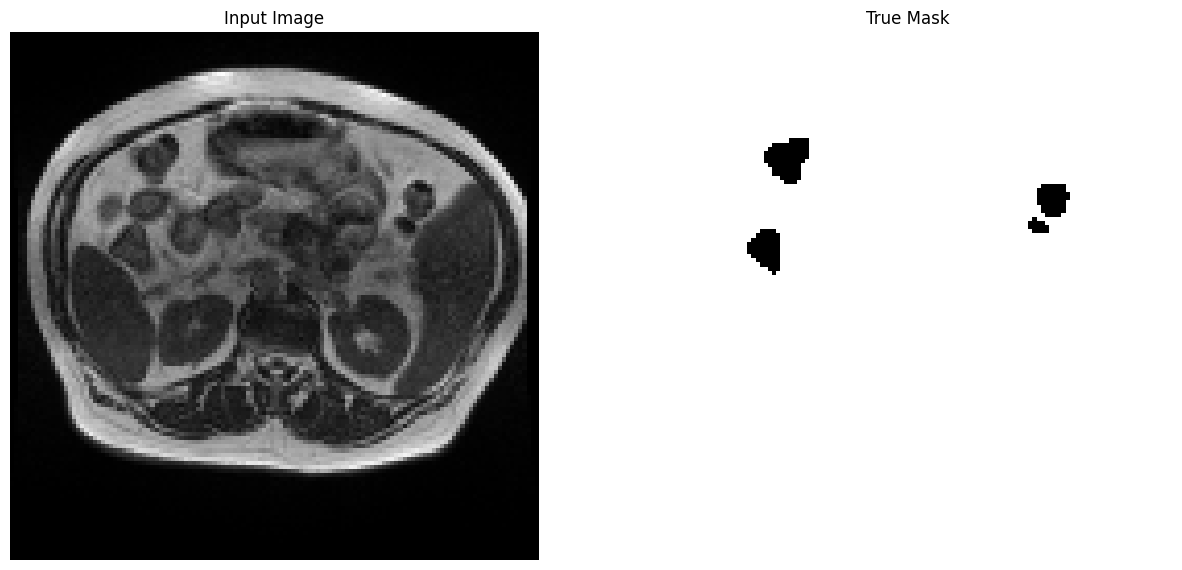

In [35]:
import tensorflow as tf
import glob
import matplotlib.pyplot as plt

train_image_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/train/images/*.png"
train_mask_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/train/masks/*.png"

image_files = glob.glob(train_image_dir)
mask_files = sorted(glob.glob(train_mask_dir))

def decode_img(img):
    img = tf.image.decode_png(img, channels=3)  # Ensure your image is rgb
    img = tf.image.resize(img, [128, 128])
    return img / 255.0  # Normalize images to [0, 1]

def decode_mask(mask):
    mask = tf.image.decode_png(mask, channels=1)  # Masks are grayscale
    mask = tf.image.resize(mask, [128, 128], method='nearest')
    mask = tf.one_hot(tf.squeeze(mask, axis=-1), depth=4)
    return mask  # Return mask with shape (256, 256, 4)


def augment(image, mask):
    # Random flipping
    if tf.random.uniform(()) > 0.5:
        image = tf.image.flip_left_right(image)
        mask = tf.image.flip_left_right(mask)
    
    # Random brightness and contrast (image only)
    image = tf.image.random_brightness(image, max_delta=0.1)
    image = tf.image.random_contrast(image, lower=0.9, upper=1.1)

    # Random saturation and hue (image only)
    image = tf.image.random_saturation(image, lower=0.7, upper=1.3)
    image = tf.image.random_hue(image, max_delta=0.05)

    # Random rotation
    degrees = tf.random.uniform((), minval=0, maxval=4, dtype=tf.int32)
    image = tf.image.rot90(image, k=degrees)
    mask = tf.image.rot90(mask, k=degrees)

    # Adding random noise
    #noise = tf.random.normal(shape=tf.shape(image), mean=0.0, stddev=0.05, dtype=tf.float32)
    #image = tf.clip_by_value(image + noise, 0.0, 1.0)

    return image, mask

def process_path(image_path, mask_path):
    image = tf.io.read_file(image_path)
    mask = tf.io.read_file(mask_path)
    image, mask = decode_img(image), decode_mask(mask)
    image, mask = augment(image, mask)
    return image, mask

# Use Dataset.from_tensor_slices to read paths
dataset = tf.data.Dataset.from_tensor_slices((image_files, mask_files))
dataset = dataset.map(process_path, num_parallel_calls=tf.data.AUTOTUNE)

# Dataset operations
BATCH_SIZE = 64
BUFFER_SIZE = 1000

train_batches = (
    dataset
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .repeat()
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

def display(display_list):
    plt.figure(figsize=(15, 15))
    title = ['Input Image', 'True Mask', 'Augmented Image', 'Augmented Mask']
    for i in range(len(display_list)):
        plt.subplot(1, len(display_list), i+1)
        plt.title(title[i])
        plt.imshow(tf.keras.utils.array_to_img(display_list[i]))
        plt.axis('off')
    plt.show()

# Example of displaying images and masks with augmentation
for images, masks in train_batches.take(1):
    sample_image, sample_mask = images[0], masks[0]
    display([sample_image, sample_mask])


In [36]:
import tensorflow as tf

def dice_coefficient(y_true, y_pred, smooth=1):
    y_true_f = tf.cast(tf.reshape(y_true, [-1]), tf.float32)
    y_pred_f = tf.cast(tf.reshape(y_pred, [-1]), tf.float32)
    intersection = tf.reduce_sum(y_true_f * y_pred_f)
    return (2. * intersection + smooth) / (tf.reduce_sum(y_true_f) + tf.reduce_sum(y_pred_f) + smooth)


In [37]:
model = multi_unet_model(n_classes=4, IMG_HEIGHT=128, IMG_WIDTH=128, IMG_CHANNELS=3)

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=[dice_coefficient]
)

In [38]:
# Assuming you have defined similar paths for validation data
val_image_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/valid/images/*.png"
val_mask_dir = "C:/Users/rahjo/Downloads/uw-madison-gi-tract-image-segmentation/segmentation_data_all/valid/masks/*.png"

val_image_files = glob.glob(val_image_dir)
val_mask_files = sorted(glob.glob(val_mask_dir))

# Function to process the validation paths, similar to the training data processing
def process_path_val(image_path, mask_path):
    image = tf.io.read_file(image_path)
    mask = tf.io.read_file(mask_path)
    image = decode_img(image)
    mask = decode_mask(mask)
    return image, mask

# Use Dataset.from_tensor_slices to read paths for validation
val_dataset = tf.data.Dataset.from_tensor_slices((val_image_files, val_mask_files))
val_dataset = val_dataset.map(process_path_val, num_parallel_calls=tf.data.AUTOTUNE)

# Prepare the validation dataset
VAL_BATCH_SIZE = 32  # You can use a smaller batch size if necessary
val_batches = (
    val_dataset
    .cache()
    .batch(VAL_BATCH_SIZE)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

In [39]:
train_batches = (
    dataset
    .cache()
    .shuffle(BUFFER_SIZE)
    .batch(BATCH_SIZE)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

val_batches = (
    val_dataset
    .cache()
    .batch(VAL_BATCH_SIZE)
    .prefetch(buffer_size=tf.data.AUTOTUNE)
)

# Now fit the model without specifying steps_per_epoch or validation_steps
history = model.fit(
    train_batches, 
    epochs=2,
    validation_data=val_batches
)


Epoch 1/2
146/499 [=======>......................] - ETA: 20:47 - loss: 0.1886 - dice_coefficient: 0.9145

KeyboardInterrupt: 

### Visulaization

In [ ]:
# Plotting the training and validation loss and Dice coefficient
plt.figure(figsize=(12, 6))

# Loss Plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()

# Dice Coefficient Plot
plt.subplot(1, 2, 2)
plt.plot(history.history.get('dice_coefficient', []), label='Train Dice Coefficient')
plt.plot(history.history.get('val_dice_coefficient', []), label='Validation Dice Coefficient')
plt.title('Dice Coefficient')
plt.ylabel('Dice Coefficient')
plt.xlabel('Epoch')
plt.legend()

plt.show()

### Evaluation

In [ ]:
# Predict using the model on the validation batches
predictions = model.predict(val_batches)

import tensorflow as tf

def dice_coefficient_per_class(y_true, y_pred, smooth=1):
    # Ensure predictions are casted to float32 for consistent datatype
    y_pred = tf.cast(y_pred, tf.float32)
    # Flatten the spatial and batch dimensions
    y_true_f = tf.reshape(y_true, [-1, y_true.shape[-1]])
    y_pred_f = tf.reshape(y_pred, [-1, y_pred.shape[-1]])
    
    # Calculate intersection and union per class
    intersection = tf.reduce_sum(y_true_f * y_pred_f, axis=0)
    union = tf.reduce_sum(y_true_f, axis=0) + tf.reduce_sum(y_pred_f, axis=0)
    
    # Calculate dice per class
    dice_per_class = (2. * intersection + smooth) / (union + smooth)
    return dice_per_class


import numpy as np

# Initialize lists to store true masks and predictions
true_masks_list = []
pred_masks_list = []

# Iterate through the validation dataset to collect all masks and predictions
for image_batch, mask_batch in val_batches:
    pred_batch = model.predict(image_batch)
    true_masks_list.append(mask_batch.numpy())
    pred_masks_list.append(pred_batch)

# Concatenate all batches to form the complete set of masks and predictions
true_masks = np.concatenate(true_masks_list, axis=0)
pred_masks = np.concatenate(pred_masks_list, axis=0)

# Calculate the dice coefficient for each class
dice_scores = dice_coefficient_per_class(true_masks, pred_masks)

print("Dice Coefficients per Class:", dice_scores.numpy())


In [31]:
OUTPUT_CLASSES = 4

model = unet_model(output_channels=OUTPUT_CLASSES)
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

# Next

In [ ]:
from tensorflow.keras.callbacks import ModelCheckpoint

# Set up the ModelCheckpoint callback to save only the best model based on validation dice coefficient
checkpoint_cb = ModelCheckpoint(
    'best_model.keras',                 # Path where the model will be saved
    monitor='val_dice_coefficient',  # Metric to monitor
    save_best_only=True,             # Save only the best model
    mode='max',                      # 'max' because higher dice_coefficient is better
    verbose=1                        # Log progress to the console
)

In [ ]:
# Now fit the model with the checkpoint callback
history = model.fit(
    train_batches, 
    epochs=2,
    validation_data=val_batches,
    callbacks=[checkpoint_cb]  # Add the checkpoint callback here
)